#### JupterLab Code
_If using Meluxina_  
`jupyter lab --no-browser --ip "*" --notebook-dir /project/home/p200469/BIO1018/BIO1018-Chromatin-Accessibility-ML  --port 8888`

Then look for token in setup text and use that as password when asked by VSCode or input the full URL with the token to avoid password authentication.

### Download Necessary Files
Dataset Link: https://www.encodeproject.org/reference-epigenomes/ENCSR247DVY/

In [ ]:
# ATAC-Seq Bulk bed file
wget "https://www.encodeproject.org/files/ENCFF821OEF/@@download/ENCFF821OEF.bed.gz"

# Histone ChIP-seq - H3K27me3
wget "https://www.encodeproject.org/files/ENCFF025QZH/@@download/ENCFF025QZH.bigWig"

# Histone ChIP-seq - H3K4me1
wget "https://www.encodeproject.org/files/ENCFF372GMC/@@download/ENCFF372GMC.bigWig"

# Histone ChIP-seq - H3K27ac
wget "https://www.encodeproject.org/files/ENCFF138YNG/@@download/ENCFF138YNG.bigWig"

# Histone ChIP-seq - H3K4me3
wget "https://www.encodeproject.org/files/ENCFF163MXP/@@download/ENCFF163MXP.bigWig"

# Histone ChIP-seq - H3K36me3
wget "https://www.encodeproject.org/files/ENCFF910BRP/@@download/ENCFF910BRP.bigWig"

# Histone ChIP-seq - H3K9me3
wget "https://www.encodeproject.org/files/ENCFF481DZL/@@download/ENCFF481DZL.bigWig"

In [ ]:
#Unzip all gzipped ENCODE files.
gunzip *.gz

### Peak Density Visualization

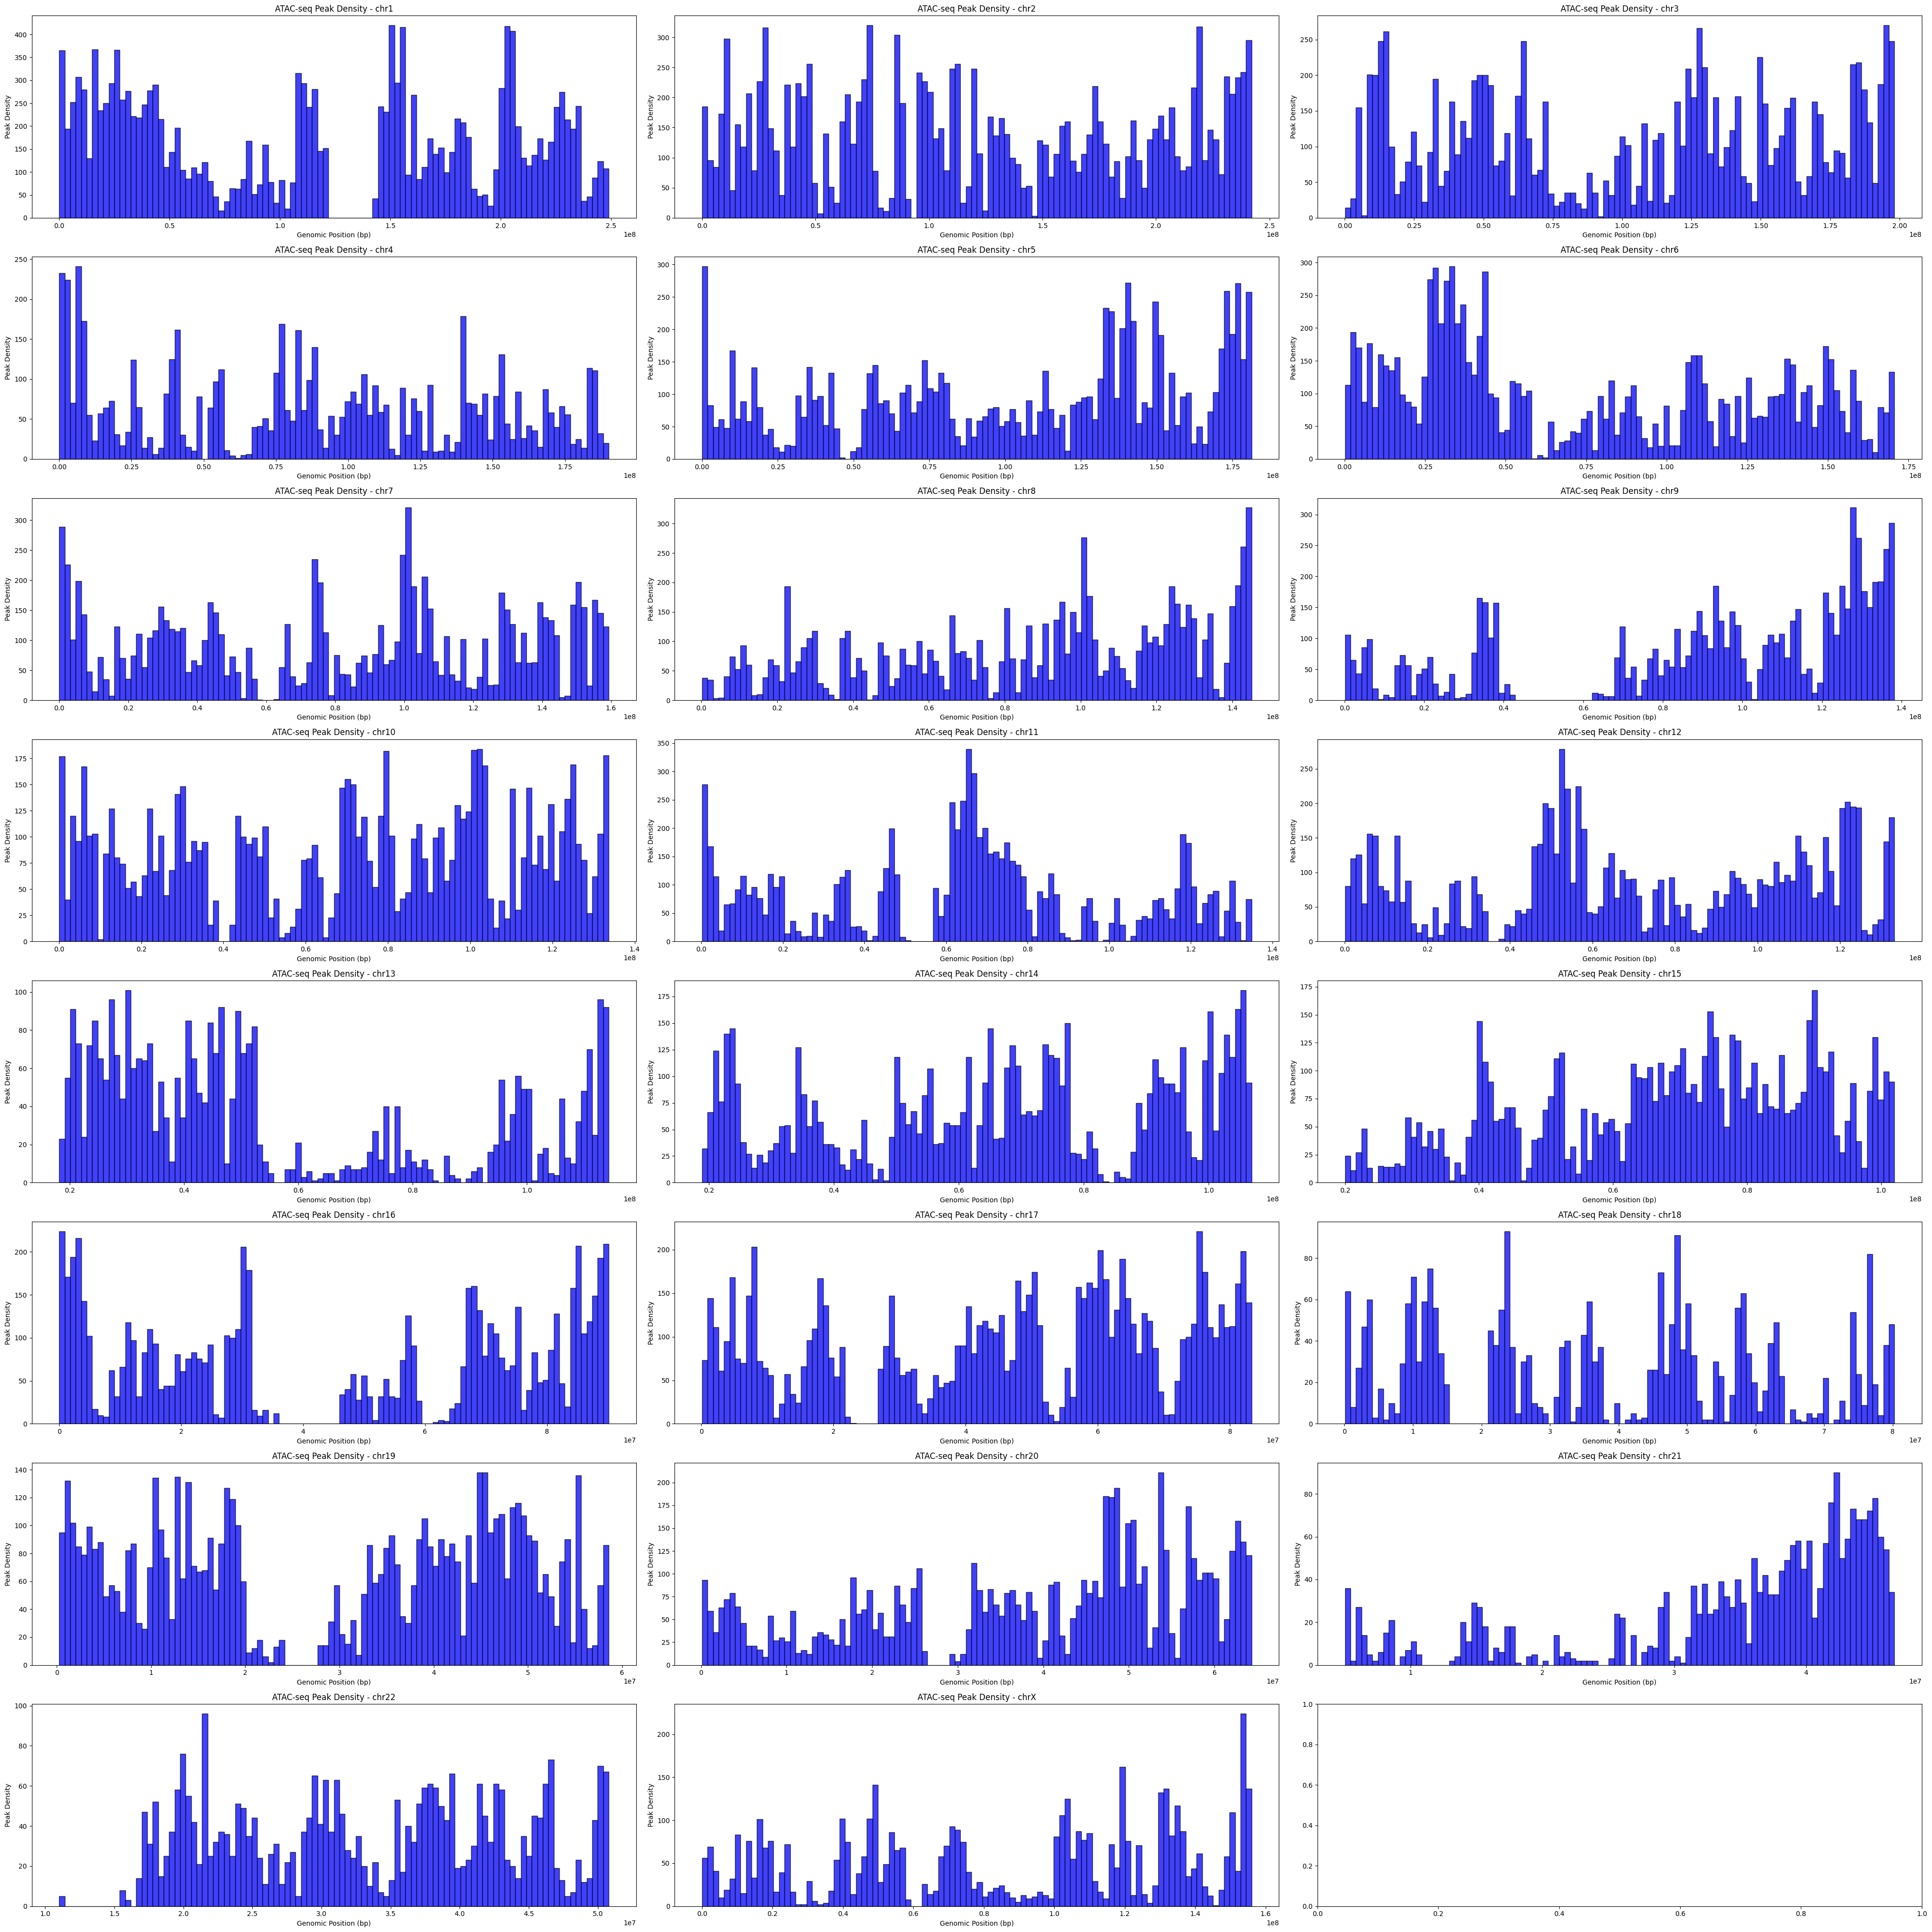

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Define the ATAC-seq BED file path
atac_seq_file = "/Users/faith/Desktop/BIO1018-Chromatin-Accessibility-ML/data/atac_bulk_IDR.bed"

# Load ATAC-seq data with correct columns
column_names = ["chromosome", "start", "end", "name", "score", "strand", "signalValue", "pValue", "qValue", "peak"]
atac_peaks = pd.read_csv(atac_seq_file, sep="\t", names=column_names, usecols=[0, 1, 2, 3, 4, 6, 7, 8, 9])

# Ensure chromosome names are formatted correctly (chr1–chr22, chrX)
valid_chromosomes = [f"chr{i}" for i in range(1, 23)] + ["chrX"]
atac_peaks = atac_peaks[atac_peaks["chromosome"].isin(valid_chromosomes)]

# Set up grid: 4 columns, calculate rows dynamically
num_chromosomes = len(valid_chromosomes)
num_cols = 3  # Change from 2 to 3 for better layout
num_rows = int(np.ceil(num_chromosomes / num_cols))  # Auto-adjust rows

fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(40, 40))  # Adjust figure size
axes = axes.flatten()  # Flatten axes for easier indexing

# Plot ATAC-seq peak density for each chromosome
for i, chrom in enumerate(valid_chromosomes):
    chrom_data = atac_peaks[atac_peaks["chromosome"] == chrom]
    
    
    ax = axes[i]
    ax.hist(chrom_data["start"], bins=100, alpha=0.75, color='blue', edgecolor='black')
    ax.set_xlabel("Genomic Position (bp)")
    ax.set_ylabel("Peak Density")
    ax.set_title(f"ATAC-seq Peak Density - {chrom}")


plt.tight_layout()
plt.show()

### Understanding Histone Marks  
Each histone modification provides insight into chromatin state and gene regulation.  

### 🔵 H3K4me3 (Active Promoters)  
- Found at **transcription start sites (TSS)**.  
- Marks **actively transcribed or poised genes**.  
- Often co-localizes with **RNA polymerase II**.  

### 🟠 H3K4me1 (Enhancer Priming)  
- Marks **primed enhancers**, not necessarily active.  
- **With H3K27ac** → Active enhancer.  
- **Without H3K27ac** → Poised enhancer.  

### 🔴 H3K27me3 (Repressive Chromatin)  
- Found in **silenced genes** and **inactive enhancers**.  
- Marks **polycomb-repressed chromatin**.  
- Opposes **H3K27ac**, linked to **closed chromatin**.  

### 🟢 H3K27ac (Active Enhancer Marker)  
- Marks **active enhancers** and **promoters**.  
- Strongly correlates with **transcriptional activity**.  
- Used to identify **active regulatory regions**.  

### 🟣 H3K9me3 (Heterochromatin & Gene Silencing)  
- Marks **constitutive heterochromatin**, often found in **centromeres and telomeres**.  
- Associated with **long-term gene repression**.  
- Helps maintain **chromosomal stability** and **silencing of repetitive elements**.  

### 🟡 H3K36me3 (Transcriptional Elongation & Active Genes)  
- Found along the **gene bodies of actively transcribed genes**.  
- Associated with **RNA polymerase II elongation**.  
- Plays a role in **preventing cryptic transcription initiation**.  

### Summary Table  

| Histone Mark | Function | Associated Chromatin State |  
|-------------|----------|----------------------------|  
| **H3K27ac** | Active Enhancer | Open, Active Enhancers |  
| **H3K4me1** | Primed Enhancer | Open/Closed, Primed for Activation |  
| **H3K27me3** | Repressive Chromatin | Closed, Polycomb Repression |  
| **H3K4me3** | Active Promoters | Open, Actively Transcribed Genes |  
| **H3K9me3** | Heterochromatin & Gene Silencing | Closed, Constitutive Heterochromatin |  
| **H3K36me3** | Transcriptional Elongation | Open, Actively Transcribed Gene Bodies |  


> Install bigWigToBedGraph if necessary
1. Download the Precompiled macOS Binary  
`wget http://hgdownload.soe.ucsc.edu/admin/exe/macOSX.x86_64/bigWigToBedGraph`

2. Make the File Executable  
`chmod +x bigWigToBedGraph`

3. Move it to /usr/local/bin/ to Use it System-Wide  
`sudo mv bigWigToBedGraph /usr/local/bin/`

4. Verify Installation  
`which bigWigToBedGraph`

In [ ]:
# Convert H3K27ac bigWig to bedGraph
bigWigToBedGraph H3K27ac.bigWig H3K27ac.bedGraph

# Convert H3K4me1 bigWig to bedGraph
bigWigToBedGraph H3K4me1.bigWig H3K4me1.bedGraph

# Convert H3K27me3 bigWig to bedGraph
bigWigToBedGraph H3K27me3.bigWig H3K27me3.bedGraph

# Convert H3K4me3 bigWig to bedGraph
bigWigToBedGraph H3K4me3.bigWig H3K4me3.bedGraph

# Convert H3K9me3 bigWig to bedGraph
bigWigToBedGraph H3K9me3.bigWig H3K9me3.bedGraph

# Convert H3K36me3 bigWig to bedGraph
bigWigToBedGraph H3K36me3.bigWig H3K36me3.bedGraph

### Load ATAC-seq Peaks for Chromosome 1

In [2]:
import pandas as pd

atac_seq_file = "/Users/faith/Desktop/BIO1018-Chromatin-Accessibility-ML/data/atac_bulk_IDR.bed"  # Update path if necessary

# Load ATAC-seq data with correct columns
column_names = ["chromosome", "start", "end", "name", "score", "strand", "signalValue", "pValue", "qValue", "peak"]
atac_peaks = pd.read_csv(atac_seq_file, sep="\t", names=column_names, usecols=[0, 1, 2, 6])

valid_chromosomes = [f"chr{i}" for i in range(1, 23)] + ["chrX"]
atac_peaks = atac_peaks[atac_peaks["chromosome"].isin(valid_chromosomes)]

# Assign chromatin state (1 = Open)
atac_peaks["peak_state"] = 1  

# Calculate peak length
atac_peaks["peak_length"] = atac_peaks["end"] - atac_peaks["start"]

atac_peaks = atac_peaks[["chromosome", "start", "end", "peak_length", "peak_state"]]

# Compute and print the average peak length
average_peak_length = atac_peaks["peak_length"].mean()
print(f"Average ATAC-seq peak length (Chromosome 1): {average_peak_length:.2f} bp")

print(atac_peaks.head)

Average ATAC-seq peak length (Chromosome 1): 857.95 bp
<bound method NDFrame.head of        chromosome      start        end  peak_length  peak_state
0           chr17   60677031   60678378         1347           1
1           chr17   59106045   59107503         1458           1
2           chr17   61862840   61864182         1342           1
3           chr20   50730651   50732230         1579           1
4           chr20   54123237   54124173          936           1
...           ...        ...        ...          ...         ...
173569       chrX  129960827  129961934         1107           1
173570       chr1   12143472   12144176          704           1
173571      chr13   24220717   24221705          988           1
173572      chr14   96051615   96052266          651           1
173573      chr10  116263536  116264400          864           1

[173570 rows x 5 columns]>


In [3]:
summary_stats = atac_peaks["peak_length"].describe()
summary_stats 

count    173570.000000
mean        857.952636
std         417.452036
min         150.000000
25%         538.000000
50%         801.000000
75%        1114.000000
max        2984.000000
Name: peak_length, dtype: float64

> I have chosen a bin size of 1000 bp to balance computational efficiency while minimizing excessive overlaps, ensuring it remains consistent with the median peak length of 800 bp from the dataset.

> There will be slight overlap but will still retain biological complexity.

In [5]:
import numpy as np
import pandas as pd
import os

# Human genome chromosome lengths (GRCh38/hg38)
# Removed chrY
chromosome_lengths = {
    "chr1": 248956422, "chr2": 242193529, "chr3": 198295559, "chr4": 190214555,
    "chr5": 181538259, "chr6": 170805979, "chr7": 159345973, "chr8": 145138636,
    "chr9": 138394717, "chr10": 133797422, "chr11": 135086622, "chr12": 133275309,
    "chr13": 114364328, "chr14": 107043718, "chr15": 101991189, "chr16": 90338345,
    "chr17": 83257441, "chr18": 80373285, "chr19": 58617616, "chr20": 64444167,
    "chr21": 46709983, "chr22": 50818468, "chrX": 156040895
}

bin_size = 1000  # Bin size in base pairs
output_file = "/Users/faith/Desktop/BIO1018-Chromatin-Accessibility-ML/data/genome_bins_combined.csv"

# List to store data for all chromosomes
all_genome_bins = []

# Process each chromosome
for chrom, length in chromosome_lengths.items():
    print(f"Processing {chrom}...")

    # Create genome bins
    bin_starts = np.arange(0, length, bin_size)
    bin_ends = bin_starts + bin_size

    genome_bins = pd.DataFrame({
        "chromosome": chrom,
        "start": bin_starts,
        "end": bin_ends,
        "chromatin_state": 0  # Assume closed chromatin by default
    })

    # Assign open chromatin state based on ATAC-seq peaks
    atac_subset = atac_peaks[atac_peaks["chromosome"] == chrom]
    for _, row in atac_subset.iterrows():
        genome_bins.loc[
            (genome_bins["start"] < row["end"]) & (genome_bins["end"] > row["start"]),
            "chromatin_state"
        ] = 1

    # Append chromosome bins to the list
    all_genome_bins.append(genome_bins)

# Concatenate all chromosome bins into a single DataFrame
final_genome_bins = pd.concat(all_genome_bins, ignore_index=True)

# Save to a single CSV file
final_genome_bins.to_csv(output_file, index=False)

# Print summary
chromatin_state_counts = final_genome_bins["chromatin_state"].value_counts()
print(f"Total Open (1): {chromatin_state_counts.get(1, 0)}, Total Closed (0): {chromatin_state_counts.get(0, 0)}")
print(f"Genome bins file created: {output_file}")

Processing chr1...
Processing chr2...
Processing chr3...
Processing chr4...
Processing chr5...
Processing chr6...
Processing chr7...
Processing chr8...
Processing chr9...
Processing chr10...
Processing chr11...
Processing chr12...
Processing chr13...
Processing chr14...
Processing chr15...
Processing chr16...
Processing chr17...
Processing chr18...
Processing chr19...
Processing chr20...
Processing chr21...
Processing chr22...
Processing chrX...
Total Open (1): 144762, Total Closed (0): 2886291
Genome bins file created: /Users/faith/Desktop/BIO1018-Chromatin-Accessibility-ML/data/genome_bins_combined.csv


## Installing and Running HOMER for Peak Annotation

### Step 1: Install Miniconda
To manage dependencies and install HOMER efficiently, Miniconda was installed using the following steps:

```bash
# Create a directory for Miniconda
mkdir -p ~/miniconda3

# Download and install Miniconda
curl https://repo.anaconda.com/miniconda/Miniconda3-latest-MacOSX-x86_64.sh -o ~/miniconda3/miniconda.sh
bash ~/miniconda3/miniconda.sh -b -u -p ~/miniconda3

# Remove the installer to free space
rm ~/miniconda3/miniconda.sh

# Activate Miniconda
source ~/miniconda3/bin/activate

# Initialize Conda for all shells
conda init --all
```

**Verification:**
```bash
# Check if Conda is installed
conda --version
```

---

### Set Up Bioconda Channels
To install **HOMER** and necessary dependencies, Bioconda and Conda-Forge channels were added:

```bash
conda config --add channels bioconda
conda config --add channels conda-forge
conda config --set channel_priority strict
```

---

### Step 3: Install HOMER and Dependencies
HOMER was installed along with required bioinformatics tools:

```bash
conda install wget samtools r-essentials bioconductor-deseq2 bioconductor-edger
```

To confirm the installation:
```bash
which homer
which annotatePeaks.pl
```

---

### Step 4: Configure HOMER
The **`configureHomer.pl`** script was run to download necessary reference data and configure HOMER:

```bash
# Navigate to the HOMER installation directory
cd ~/miniconda3/envs/homer_env/

# Run the HOMER configuration script
perl /Users/faith/Homer/configureHomer.pl -install
```

To ensure HOMER commands are recognized globally, the following was added to the shell configuration file (`.zshrc`):

```bash
echo 'PATH=$PATH:/Users/faith/Homer//bin/' >> ~/.zshrc
source ~/.zshrc
```

---

### Step 5: Annotate Peaks Using HOMER
With HOMER properly set up, **ATAC-seq peaks** were annotated against the human reference genome (`hg38`):

```bash
cd ~/Desktop/BIO1018-Chromatin-Accessibility-ML/data

# Run HOMER peak annotation
annotatePeaks.pl atac_bulk_IDR.bed hg38 > peaks_annotated.txt
```

If `hg38` reference data was missing, it was installed with:

```bash
perl /Users/faith/Homer/configureHomer.pl -install hg38
```

The annotated peaks were saved in `peaks_annotated.txt`, which was then used for further integration into the **feature matrix**.

### Validating Chromatin_State Assignment with HOMER

In [23]:
import pandas as pd

print("Loading genome bins file...")

# Load genome bins file
genome_bins_file = "/Users/faith/Desktop/BIO1018-Chromatin-Accessibility-ML/data/genome_bins_combined.csv"
genome_bins = pd.read_csv(genome_bins_file, sep=",", header=0, names=["Chromosome", "Start", "End", "Chromatin_State"])

print(f"Genome bins loaded. Shape: {genome_bins.shape}")
print(f"Genome bins columns: {genome_bins.columns.tolist()}")

# Load HOMER-annotated peaks
print("Loading HOMER-annotated peaks...")
annotated_peaks_file = "/Users/faith/Desktop/BIO1018-Chromatin-Accessibility-ML/data/peaks_annotated.txt"
homer_columns = ["PeakID", "Chromosome", "Start", "End", "Strand", "Peak Score", "Focus Ratio", "Annotation",
                 "Detailed Annotation", "Distance to TSS", "Nearest PromoterID", "Entrez ID", "Nearest Unigene",
                 "Nearest Refseq", "Nearest Ensembl", "Gene Name", "Gene Alias", "Gene Description", "Gene Type"]

annotated_peaks = pd.read_csv(annotated_peaks_file, sep="\t", names=homer_columns, header=0)

print(f"HOMER annotation file loaded. Shape: {annotated_peaks.shape}")

# Standardize chromosome column names to lowercase for consistency
genome_bins["Chromosome"] = genome_bins["Chromosome"].astype(str).str.lower()
annotated_peaks["Chromosome"] = annotated_peaks["Chromosome"].astype(str).str.lower()

# Initialize annotation columns (binary indicators)
for col in ["Promoter", "Intergenic", "Exon", "Intron"]:
    genome_bins[col] = 0

print("Initialized annotation columns.")

# Function to classify genomic regions from HOMER annotations
def classify_region(annotation):
    if isinstance(annotation, str):
        if "promoter-TSS" in annotation:
            return "Promoter"
        elif "Intergenic" in annotation:
            return "Intergenic"
        elif "exon" in annotation:
            return "Exon"
        elif "intron" in annotation:
            return "Intron"
    return None  # Unmatched categories remain None

# Apply classification function to HOMER annotations
annotated_peaks["Region"] = annotated_peaks["Annotation"].apply(classify_region)

# Print summary of region classifications
print("Region classification counts:")
print(annotated_peaks["Region"].value_counts())

# Get unique chromosomes to track progress
unique_chromosomes = annotated_peaks["Chromosome"].unique()
print(f"Processing annotation assignment for {len(unique_chromosomes)} chromosomes...")

# Merge HOMER annotations with genome bins based on genomic coordinates
print("Starting annotation assignment...")
overlap_counts = {"Promoter": 0, "Intergenic": 0, "Exon": 0, "Intron": 0}

# Process each chromosome separately and track progress
for chrom in unique_chromosomes:
    print(f"Processing {chrom}...")
    chr_peaks = annotated_peaks[annotated_peaks["Chromosome"] == chrom]

    for _, row in chr_peaks.iterrows():
        overlap_mask = (genome_bins["Chromosome"] == row["Chromosome"]) & \
                       (genome_bins["Start"] < row["End"]) & \
                       (genome_bins["End"] > row["Start"])
        
        if row["Region"]:
            affected_rows = overlap_mask.sum()
            genome_bins.loc[overlap_mask, row["Region"]] = 1
            overlap_counts[row["Region"]] += affected_rows
    
    print(f"Completed annotation for {chrom}.")

print("Annotation assignment completed.")
for category, count in overlap_counts.items():
    print(f"{category} overlaps found: {count}")

# Save the updated dataset
updated_genome_bins_file = "/Users/faith/Desktop/BIO1018-Chromatin-Accessibility-ML/data/genome_bins_annotated.csv"
genome_bins.to_csv(updated_genome_bins_file, index=False)

print(f"Updated genome bins file saved: {updated_genome_bins_file}")
print("Processing completed successfully.")

Loading genome bins file...
Genome bins loaded. Shape: (3031053, 4)
Genome bins columns: ['Chromosome', 'Start', 'End', 'Chromatin_State']
Loading HOMER-annotated peaks...
HOMER annotation file loaded. Shape: (173574, 19)
Initialized annotation columns.
Region classification counts:
Region
Intron        66524
Intergenic    57999
Promoter      32371
Exon          13512
Name: count, dtype: int64
Processing annotation assignment for 24 chromosomes...
Starting annotation assignment...
Processing chr1...
Completed annotation for chr1.
Processing chr21...
Completed annotation for chr21.
Processing chr4...
Completed annotation for chr4.
Processing chr5...
Completed annotation for chr5.
Processing chrx...
Completed annotation for chrx.
Processing chr8...
Completed annotation for chr8.
Processing chr9...
Completed annotation for chr9.
Processing chr20...
Completed annotation for chr20.
Processing chr19...
Completed annotation for chr19.
Processing chr10...
Completed annotation for chr10.
Proces

### Genomic Region Distribution (HOMER) of Peaks

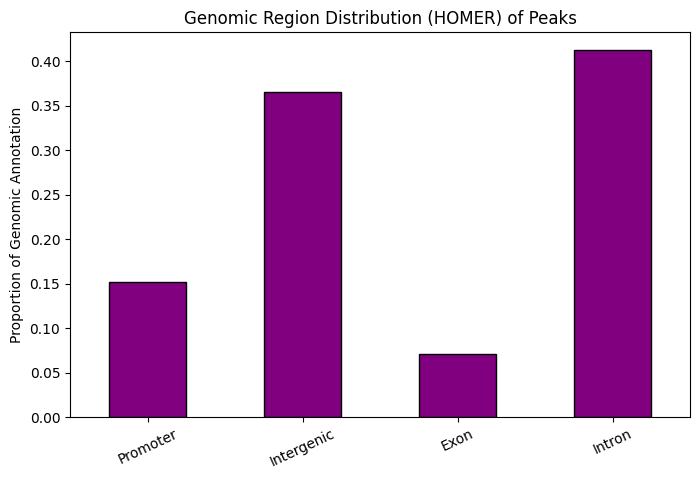

In [25]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the original HOMER-annotated feature matrix
file_path = "/Users/faith/Desktop/BIO1018-Chromatin-Accessibility-ML/data/genome_bins_annotated.csv"
df = pd.read_csv(file_path)

# Filter only for Peak = 1 (since HOMER only annotated peaks)
df_peak1 = df[df["Chromatin_State"] == 1]

# Define HOMER annotation categories
homer_annotations = ["Promoter", "Intergenic", "Exon", "Intron"]

# Compute proportions of each annotation type
annotation_counts = df_peak1[homer_annotations].sum()
annotation_counts_norm = annotation_counts / annotation_counts.sum()  # Normalize for better comparison

# Plot bar chart
plt.figure(figsize=(8, 5))
annotation_counts_norm.plot(kind="bar", color="purple", edgecolor="black")
plt.title("Genomic Region Distribution (HOMER) of Peaks")
plt.ylabel("Proportion of Genomic Annotation")
plt.xticks(rotation=25)
plt.show()

In [7]:
import pandas as pd

# Load the genome bins file
file_path = "/Users/faith/Desktop/BIO1018-Chromatin-Accessibility-ML/data/genome_bins_combined.csv"
genome_bins = pd.read_csv(file_path)

# Remove chrY if it exists in the dataset

# Count the number of open (1) and closed (0) bins
chromatin_state_counts = genome_bins["chromatin_state"].value_counts()

# Print the counts
print("Chromatin State Counts")
print(chromatin_state_counts)

Chromatin State Counts
chromatin_state
0    2886291
1     144762
Name: count, dtype: int64


## Assign Histone Mark Signals to each Bin (Two-Ways)

### (Preferred) Use bedtools map to overlap Histone Marks
First save genome bins as .bed file for bedtools.

In [28]:
import pandas as pd

# Read the CSV file
df = pd.read_csv("/Users/faith/Desktop/BIO1018-Chromatin-Accessibility-ML/data/genome_bins_combined.csv")

bed_df = df[["chromosome", "start", "end", "chromatin_state"]]

# Write out as a tab-delimited file without the header or index.
bed_df.to_csv("genome_bins_combined.bed", sep="\t", header=False, index=False)

In [1]:
cd /Users/faith/Desktop/BIO1018-Chromatin-Accessibility-ML/data

/Users/faith/Desktop/BIO1018-Chromatin-Accessibility-ML/data


In [ ]:
import pandas as pd
import re
import os

# Function to extract numerical chromosome order, excluding chrY
def chromosome_sort_key(chrom):
    match = re.match(r'chr(\d+|X)', chrom) 
    if match:
        val = match.group(1)
        return int(val) if val.isdigit() else 23  # X = 23
    return 24  # Any unexpected chromosomes go last

# Load and sort genome_bins_combined.bed
print("Sorting genome_bins_combined.bed...")
genome_bins = pd.read_csv("genome_bins_combined.bed", sep='\t', header=None, 
                          names=["chromosome", "start", "end", "chromatin_state"])

# Exclude chrY
genome_bins = genome_bins[genome_bins["chromosome"] != "chrY"]

# Sort chromosomes and positions
genome_bins = genome_bins.sort_values(by=["chromosome"], key=lambda x: x.map(chromosome_sort_key)).sort_values(by=["start"])

# Save the cleaned and sorted file
genome_bins.to_csv("genome_bins_combined_sorted.bed", sep='\t', header=False, index=False)
print("genome_bins_combined_sorted.bed saved (chrY removed).")

In [4]:
import pandas as pd
import re
import os

# Function to extract numerical chromosome order
def chromosome_sort_key(chrom):
    match = re.match(r'chr(\d+|X)', chrom)  # Match chr1, chr2, ..., chrX
    if match:
        val = match.group(1)
        if val.isdigit():
            return int(val)  # Convert digit-based chromosomes normally (chr1, chr2, ..., chr22)
        elif val == "X":
            return 23  # Assign X = 23
    return 24  # Any unexpected chromosomes (including chrY) go last

# List of Histone Mark Files
histone_files = [
    "H3K4me1.bedGraph",
    "H3K4me3.bedGraph",
    "H3K27ac.bedGraph",
    "H3K27me3.bedGraph",
    "H3K9me3.bedGraph",
    "H3K36me3.bedGraph"
]

# Process Each Histone Mark File with Chunking
chunk_size = 500000  # Adjust based on available RAM

for filename in histone_files:
    if os.path.exists(filename):  # Ensure the file exists before processing
        print(f"Sorting {filename} in chunks...")

        sorted_filename = f"{filename}.tmp"  # Temporary file for sorted output
        first_chunk = True  # Track first chunk for writing headers

        # Read in chunks, sort, and write back incrementally
        for chunk in pd.read_csv(filename, sep='\t', header=None, names=["chromosome", "start", "end", "score"], chunksize=chunk_size):
            chunk = chunk.sort_values(by=["chromosome"], key=lambda x: x.map(chromosome_sort_key)).sort_values(by=["start"])

            # Write to file (overwrite first time, then append)
            chunk.to_csv(sorted_filename, sep='\t', header=False, index=False, mode="w" if first_chunk else "a")
            first_chunk = False

        # Replace original file with sorted file
        os.replace(sorted_filename, filename)
        print(f"{filename} sorted and overwritten.")

    else:
        print(f"Warning: {filename} not found. Skipping.")

print("\nAll histone mark files have been sorted and overwritten successfully.")

Sorting H3K4me1.bedGraph in chunks...
H3K4me1.bedGraph sorted and overwritten.
Sorting H3K4me3.bedGraph in chunks...
H3K4me3.bedGraph sorted and overwritten.
Sorting H3K27ac.bedGraph in chunks...
H3K27ac.bedGraph sorted and overwritten.
Sorting H3K27me3.bedGraph in chunks...
H3K27me3.bedGraph sorted and overwritten.
Sorting H3K9me3.bedGraph in chunks...
H3K9me3.bedGraph sorted and overwritten.
Sorting H3K36me3.bedGraph in chunks...
H3K36me3.bedGraph sorted and overwritten.

All histone mark files have been sorted and overwritten successfully.


In [ ]:
sort -k1,1 -k2,2n genome_bins_combined.bed -o genome_bins_combined.bed

for file in H3K4me1.bedGraph H3K4me3.bedGraph H3K27ac.bedGraph H3K27me3.bedGraph H3K9me3.bedGraph H3K36me3.bedGraph; do
    sort -k1,1 -k2,2n "$file" -o "$file"
    echo "Sorted: $file"
done

In [ ]:
### Run in command line

# Run bedtools map for each histone mark separately
bedtools map -a genome_bins_combined.bed -b H3K4me1.bedGraph -c 4 -o mean > tmp_H3K4me1.bed
bedtools map -a genome_bins_combined.bed -b H3K4me3.bedGraph -c 4 -o mean > tmp_H3K4me3.bed
bedtools map -a genome_bins_combined.bed -b H3K27ac.bedGraph -c 4 -o mean > tmp_H3K27ac.bed
bedtools map -a genome_bins_combined.bed -b H3K27me3.bedGraph -c 4 -o mean > tmp_H3K27me3.bed
bedtools map -a genome_bins_combined.bed -b H3K9me3.bedGraph -c 4 -o mean > tmp_H3K9me3.bed
bedtools map -a genome_bins_combined.bed -b H3K36me3.bedGraph -c 4 -o mean > tmp_H3K36me3.bed

############
# Extract the mapped value column from each intermediate file
cut -f5 tmp_H3K4me1.bed > H3K4me1_col.txt
cut -f5 tmp_H3K4me3.bed > H3K4me3_col.txt
cut -f5 tmp_H3K27ac.bed > H3K27ac_col.txt
cut -f5 tmp_H3K27me3.bed > H3K27me3_col.txt
cut -f5 tmp_H3K9me3.bed > H3K9me3_col.txt
cut -f5 tmp_H3K36me3.bed > H3K36me3_col.txt

# Merge the columns into a final CSV file
paste -d, <(sed 's/\t/,/g' genome_bins_combined.bed) H3K4me1_col.txt H3K4me3_col.txt H3K27ac_col.txt H3K27me3_col.txt H3K9me3_col.txt H3K36me3_col.txt  > genome_bins_histones_all_chrs.csv

# Replace missing values with 0
awk -F',' 'BEGIN {OFS=","} {if ($5==".") $5="0"; print}' genome_bins_histones_all_chrs.csv > tmp && mv tmp genome_bins_histones_all_chrs.csv
awk -F',' 'BEGIN {OFS=","} {if ($6==".") $6="0"; print}' genome_bins_histones_all_chrs.csv > tmp && mv tmp genome_bins_histones_all_chrs.csv
awk -F',' 'BEGIN {OFS=","} {if ($7==".") $7="0"; print}' genome_bins_histones_all_chrs.csv > tmp && mv tmp genome_bins_histones_all_chrs.csv
awk -F',' 'BEGIN {OFS=","} {if ($8==".") $8="0"; print}' genome_bins_histones_all_chrs.csv > tmp && mv tmp genome_bins_histones_all_chrs.csv
awk -F',' 'BEGIN {OFS=","} {if ($9==".") $9="0"; print}' genome_bins_histones_all_chrs.csv > tmp && mv tmp genome_bins_histones_all_chrs.csv
awk -F',' 'BEGIN {OFS=","} {if ($10==".") $10="0"; print}' genome_bins_histones_all_chrs.csv > tmp && mv tmp genome_bins_histones_all_chrs.csv

# Remove temp files
rm tmp_H3K4me1.bed tmp_H3K4me3.bed tmp_H3K27ac.bed tmp_H3K27me3.bed tmp_H3K9me3.bed tmp_H3K36me3.bed
rm H3K4me1_col.txt H3K4me3_col.txt H3K27ac_col.txt H3K27me3_col.txt H3K9me3_col.txt H3K36me3_col.txt

### (Optional) Use Python to overlap Histone Marks

In [ ]:
import pandas as pd
import numpy as np

# Define bin size (in bp)
bin_size = 1000

data_dir = "/Users/faith/Desktop/BIO1018-Chromatin-Accessibility-ML/data/"


# Load genome bins for all chromosomes
genome_bins = pd.read_csv("/Users/faith/Desktop/BIO1018-Chromatin-Accessibility-ML/data/genome_bins_combined.csv")
genome_bins = genome_bins.rename(columns={"chromosome": "Chromosome", "start": "Start", "end": "End"})
n_bins = len(genome_bins)  # Total number of bins

# Dictionary with histone mark names and corresponding bedGraph files.
histone_files = {
    "H3K4me1": data_dir + "H3K4me1.bedGraph",
    "H3K4me3": data_dir + "H3K4me3.bedGraph",
    "H3K27ac": data_dir + "H3K27ac.bedGraph",
    "H3K27me3": data_dir + "H3K27me3.bedGraph",
    "H3K9me3": data_dir + "H3K9me3.bedGraph",
    "H3K36me3": data_dir + "H3K36me3.bedGraph",
}

# Initialize new columns in genome_bins for each histone mark.
for mark in histone_files.keys():
    genome_bins[mark] = 0.0

# Process each histone mark file in chunks for **all chromosomes**.
for mark, filename in histone_files.items():
    print(f"Processing {mark} from {filename}...")

    # Create an array to store signal sums.
    signal_sum = np.zeros(n_bins, dtype=np.float64)
    
    chunksize = 100000  # adjust for memory optimization
    for chunk in pd.read_csv(filename, sep='\t', header=None,
                             names=['chrom', 'start', 'end', 'score'],
                             chunksize=chunksize):
        # Process each chromosome separately
        for chrom in genome_bins["Chromosome"].unique():
            chrom_bins = genome_bins[genome_bins["Chromosome"] == chrom]
            chrom_bin_indices = chrom_bins.index.to_numpy()

            # Filter bedGraph data for this chromosome
            chrom_chunk = chunk[chunk["chrom"] == chrom]
            if chrom_chunk.empty:
                continue  # Skip if no histone signal for this chromosome
            
            # Process each interval in this chunk
            for row in chrom_chunk.itertuples(index=False):
                s = row.start
                e = row.end
                score = row.score
                
                # Compute first and last bin indices for the interval.
                first_bin = int(s // bin_size)
                last_bin = int((e - 1) // bin_size)
                
                # Clip indices to valid range.
                first_bin = max(0, first_bin)
                last_bin = min(len(chrom_bins) - 1, last_bin)

                # Loop over affected bins.
                for bin_index in range(first_bin, last_bin + 1):
                    bin_start = bin_index * bin_size
                    bin_end = bin_start + bin_size
                    # Calculate overlap between the bin and the interval.
                    overlap = min(bin_end, e) - max(bin_start, s)
                    if overlap > 0:
                        signal_sum[chrom_bin_indices[bin_index]] += overlap * score

            print(f"Histone {mark} processed for {chrom}")

    # Normalize the accumulated signal by the bin size.
    genome_bins[mark] = signal_sum / bin_size

# Save the final genome bins with histone marks.
output_file = "genome_bins_histones_all_chrs.csv"
genome_bins.to_csv(output_file, index=False)

print(f"Genome bins file with histone marks created: {output_file}")

### Remove Duplicate Values

In [1]:
import pandas as pd

histone_signals_file = "/Users/faith/Desktop/BIO1018-Chromatin-Accessibility-ML/data/genome_bins_histones_all_chrs.csv"

# Load histone signal data (Fix the incorrect names format and missing header)
histone_columns = ["chromosome", "start", "end", "chromatin_state", "H3K4me1", "H3K4me3", "H3K27ac", "H3K27me3", "H3K9me3", "H3K36me3"]
df = pd.read_csv(histone_signals_file, sep=",", header=None, names=histone_columns)

# Drop duplicates based on columns 5-10 (H3K4me1 to H3K36me3)
df_cleaned = df.drop_duplicates(subset=histone_columns[4:])

# Save the cleaned data (optional)
df_cleaned.to_csv("genome_bins_histones_all_chrs_dedup.csv", index=False)

In [12]:
import pandas as pd

# Load the dataset
file_path = "/Users/faith/Desktop/BIO1018-Chromatin-Accessibility-ML/data/genome_bins_histones_all_chrs_dedup.csv"
df = pd.read_csv(file_path)

# Extract histone marks columns (assuming the column names are known)
histone_marks = ["H3K4me1", "H3K4me3", "H3K27ac", "H3K27me3", "H3K9me3", "H3K36me3"]

# Describe the histone marks to check their distribution
histone_stats = df[histone_marks].describe()

histone_stats

,H3K4me1,H3K4me3,H3K27ac,H3K27me3,H3K9me3,H3K36me3
count,2.805747e+06,2.805747e+06,2.805747e+06,2.805747e+06,2.805747e+06,2.805747e+06
mean,9.284954e-01,1.619672e+00,1.876460e+00,4.284724e-01,3.267553e-01,5.210774e-01
std,3.873447e+00,1.450186e+01,1.610315e+01,1.078472e+00,6.554833e-01,1.607422e+00
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.951391e-02,5.728266e-02,2.143730e-02,6.359958e-02,6.878579e-02,5.405681e-02
50%,5.903432e-02,1.048672e-01,4.698577e-02,1.653574e-01,1.522299e-01,1.066401e-01
75%,2.174493e-01,1.686104e-01,1.078025e-01,3.871549e-01,3.276268e-01,2.416798e-01
max,2.353819e+02,5.857773e+02,6.556597e+02,1.448525e+02,6.892392e+01,1.978991e+02


### Distribution Plots for Peak Lengths & Histone Marks

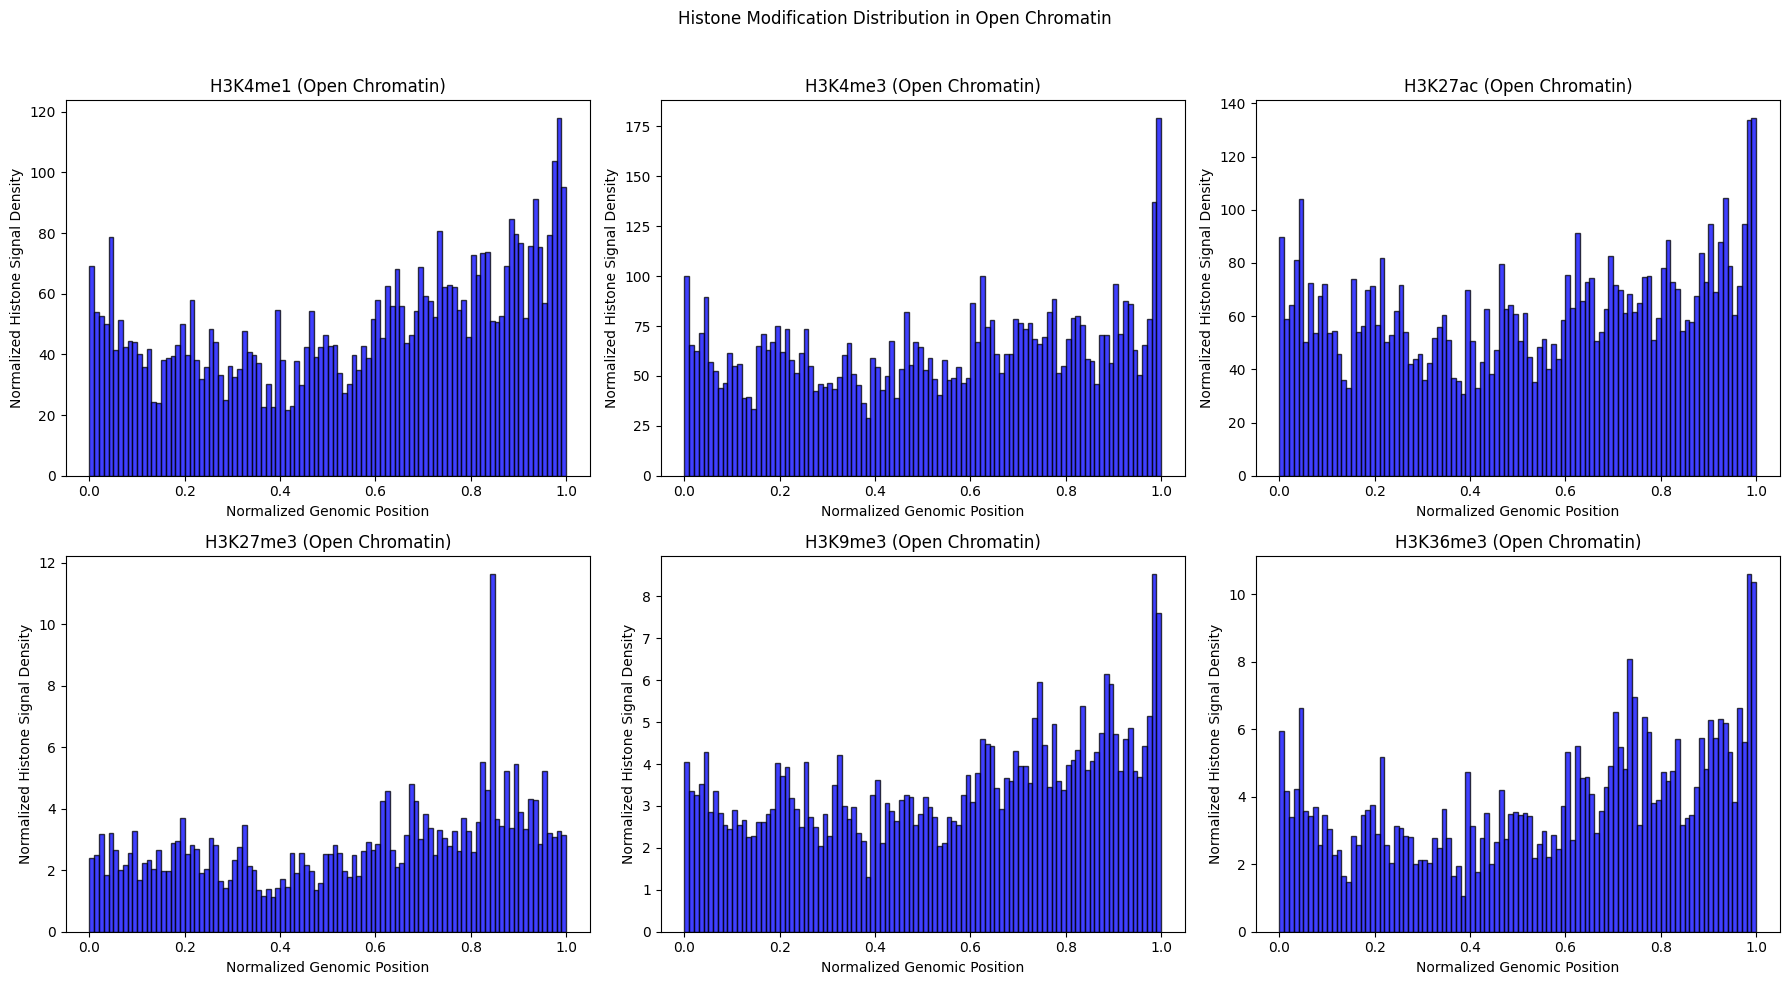

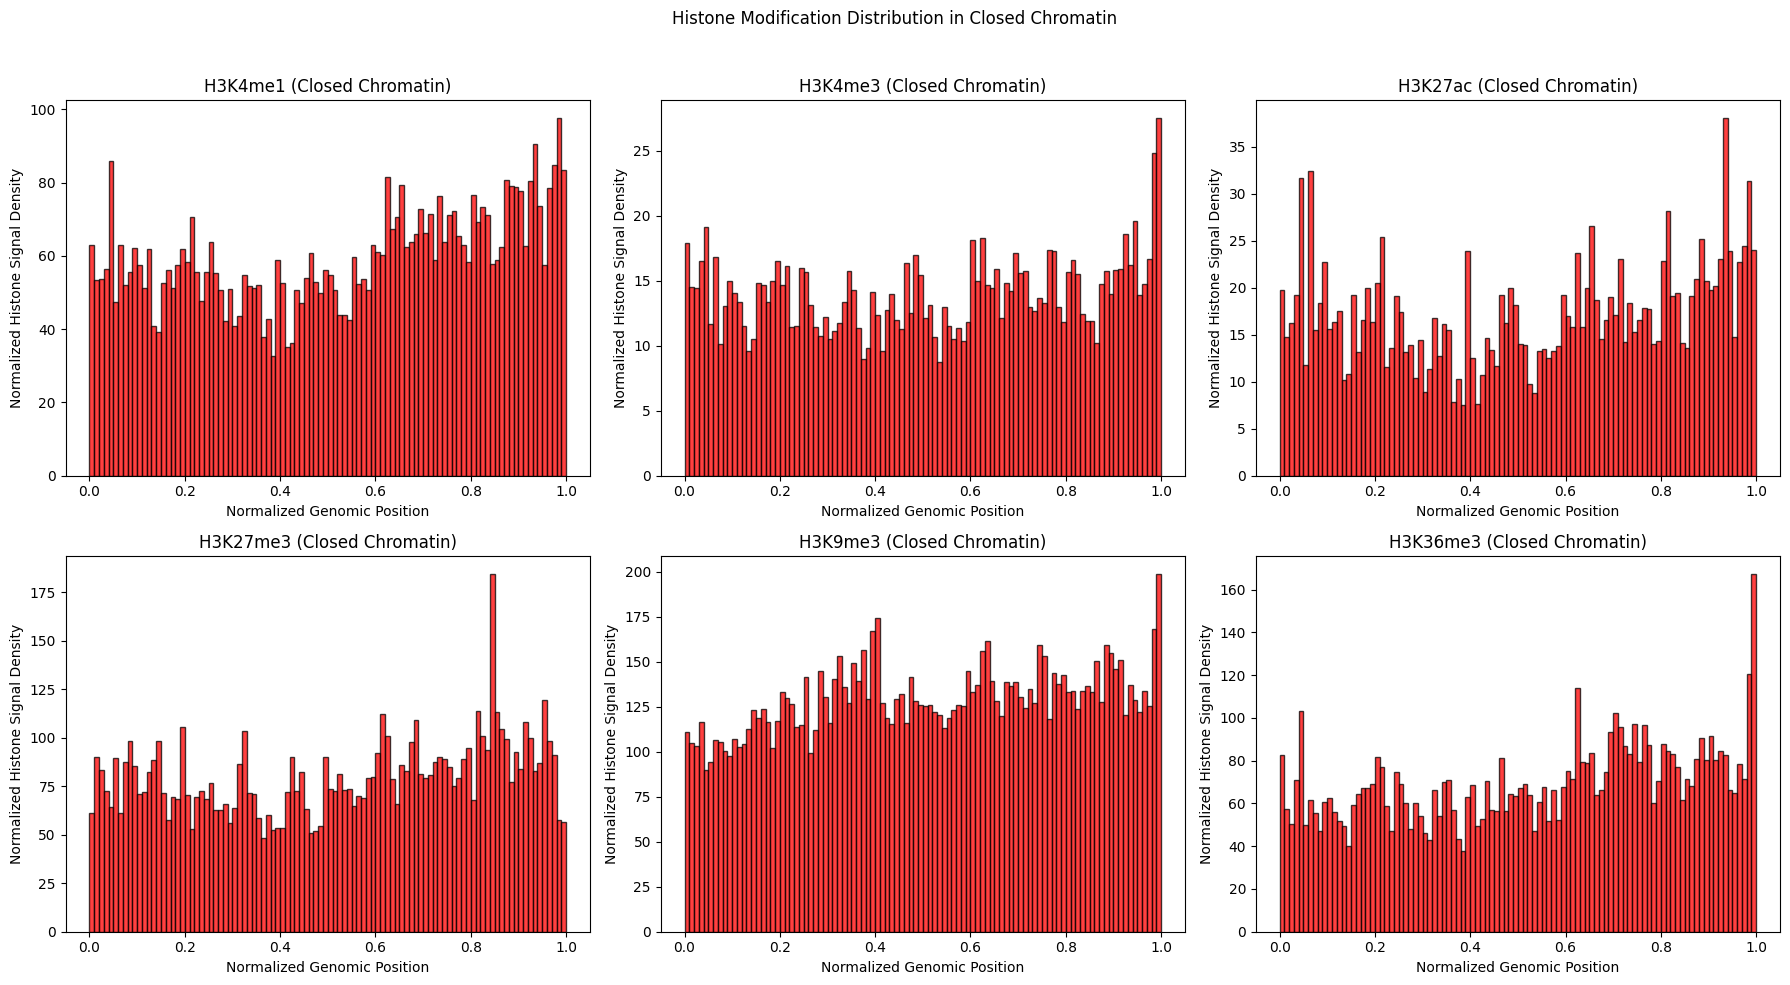

In [13]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Load chromosome lengths (GRCh38/hg38)
chromosome_lengths = {
    "chr1": 248956422, "chr2": 242193529, "chr3": 198295559, "chr4": 190214555,
    "chr5": 181538259, "chr6": 170805979, "chr7": 159345973, "chr8": 145138636,
    "chr9": 138394717, "chr10": 133797422, "chr11": 135086622, "chr12": 133275309,
    "chr13": 114364328, "chr14": 107043718, "chr15": 101991189, "chr16": 90338345,
    "chr17": 83257441, "chr18": 80373285, "chr19": 58617616, "chr20": 64444167,
    "chr21": 46709983, "chr22": 50818468, "chrX": 156040895
}

# Load histone signal data
histone_signals_file = "/Users/faith/Desktop/BIO1018-Chromatin-Accessibility-ML/data/final_feature_matrix.csv"
# Using a previously generated file, that was created retrospecitvely.
# The above code and output file will yield the same result, simply change columns names from histone_columns.

histone_columns = ["chromosome", "start", "end", "chromatin_state", 
                   "H3K4me1", "H3K4me3", "H3K27ac", "H3K27me3", "H3K9me3", "H3K36me3",
                   "ESR1_signal", "FOXA1_signal", "GATA3_signal"]

histone_signals = pd.read_csv(histone_signals_file, sep=",", header=0, names=histone_columns)

# Ensure chromosome names are strings
histone_signals["chromosome"] = histone_signals["chromosome"].astype(str)

# Normalize genomic positions by chromosome length
histone_signals["norm_position"] = histone_signals["start"] / histone_signals["chromosome"].map(chromosome_lengths)

# Normalize histone signals (Min-Max Scaling per mark)
histone_marks = ["H3K4me1", "H3K4me3", "H3K27ac", "H3K27me3", "H3K9me3", "H3K36me3"]
for histone in histone_marks:
    histone_signals[histone] = (histone_signals[histone] - histone_signals[histone].min()) / (histone_signals[histone].max() - histone_signals[histone].min())

# Separate open and closed chromatin regions
open_chromatin = histone_signals[histone_signals["chromatin_state"] == 1]
closed_chromatin = histone_signals[histone_signals["chromatin_state"] == 0]

# Create 2x3 subplots for open chromatin
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
fig.suptitle("Histone Modification Distribution in Open Chromatin")

axes = axes.flatten()
for i, histone in enumerate(histone_marks):
    ax = axes[i]
    ax.hist(open_chromatin["norm_position"], bins=100, weights=open_chromatin[histone], alpha=0.75, color="blue", edgecolor="black")
    ax.set_xlabel("Normalized Genomic Position")
    ax.set_ylabel("Normalized Histone Signal Density")
    ax.set_title(f"{histone} (Open Chromatin)")

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

# Create 2x3 subplots for closed chromatin
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
fig.suptitle("Histone Modification Distribution in Closed Chromatin")

axes = axes.flatten()
for i, histone in enumerate(histone_marks):
    ax = axes[i]
    ax.hist(closed_chromatin["norm_position"], bins=100, weights=closed_chromatin[histone], alpha=0.75, color="red", edgecolor="black")
    ax.set_xlabel("Normalized Genomic Position")
    ax.set_ylabel("Normalized Histone Signal Density")
    ax.set_title(f"{histone} (Closed Chromatin)")

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

### Merging Annotations into Histone File

In [ ]:
import pandas as pd

# Load genome bins with HOMER annotations
genome_bins_file = "/Users/faith/Desktop/BIO1018-Chromatin-Accessibility-ML/data/genome_bins_annotated.csv"
genome_bins = pd.read_csv(genome_bins_file)

# Load feature matrix
feature_cols= ["Chromosome","Start","End","chromatin_state","H3K4me1","H3K4me3","H3K27ac","H3K27me3","H3K9me3","H3K36me3","ESR1_signal","FOXA1_signal","GATA3_signal"]
feature_matrix_file = "/Users/faith/Desktop/BIO1018-Chromatin-Accessibility-ML/data/final_feature_matrix.csv"
feature_matrix = pd.read_csv(feature_matrix_file, header=0, names=feature_cols)

# Merge HOMER annotations into the feature matrix based on 'Chromosome', 'Start', 'End'
merged_df = feature_matrix.merge(genome_bins, on=["Chromosome", "Start", "End"], how="left")

# Fill any missing annotation values with 0 (in case some bins were not in genome_bins_annotated)
merged_df.fillna({"Promoter": 0, "Intergenic": 0, "Exon": 0, "Intron": 0}, inplace=True)

# Save the updated feature matrix with annotations
output_file = "/Users/faith/Desktop/BIO1018-Chromatin-Accessibility-ML/data/feature_matrix_with_annotations.csv"
merged_df.to_csv(output_file, index=False)

print(f"Merged file saved as: {output_file}")

Merged file saved as: /Users/faith/Desktop/BIO1018-Chromatin-Accessibility-ML/data/feature_matrix_with_annotations.csv


### Histone Modification Signals Across Genomic Annotations (Peak = 1)

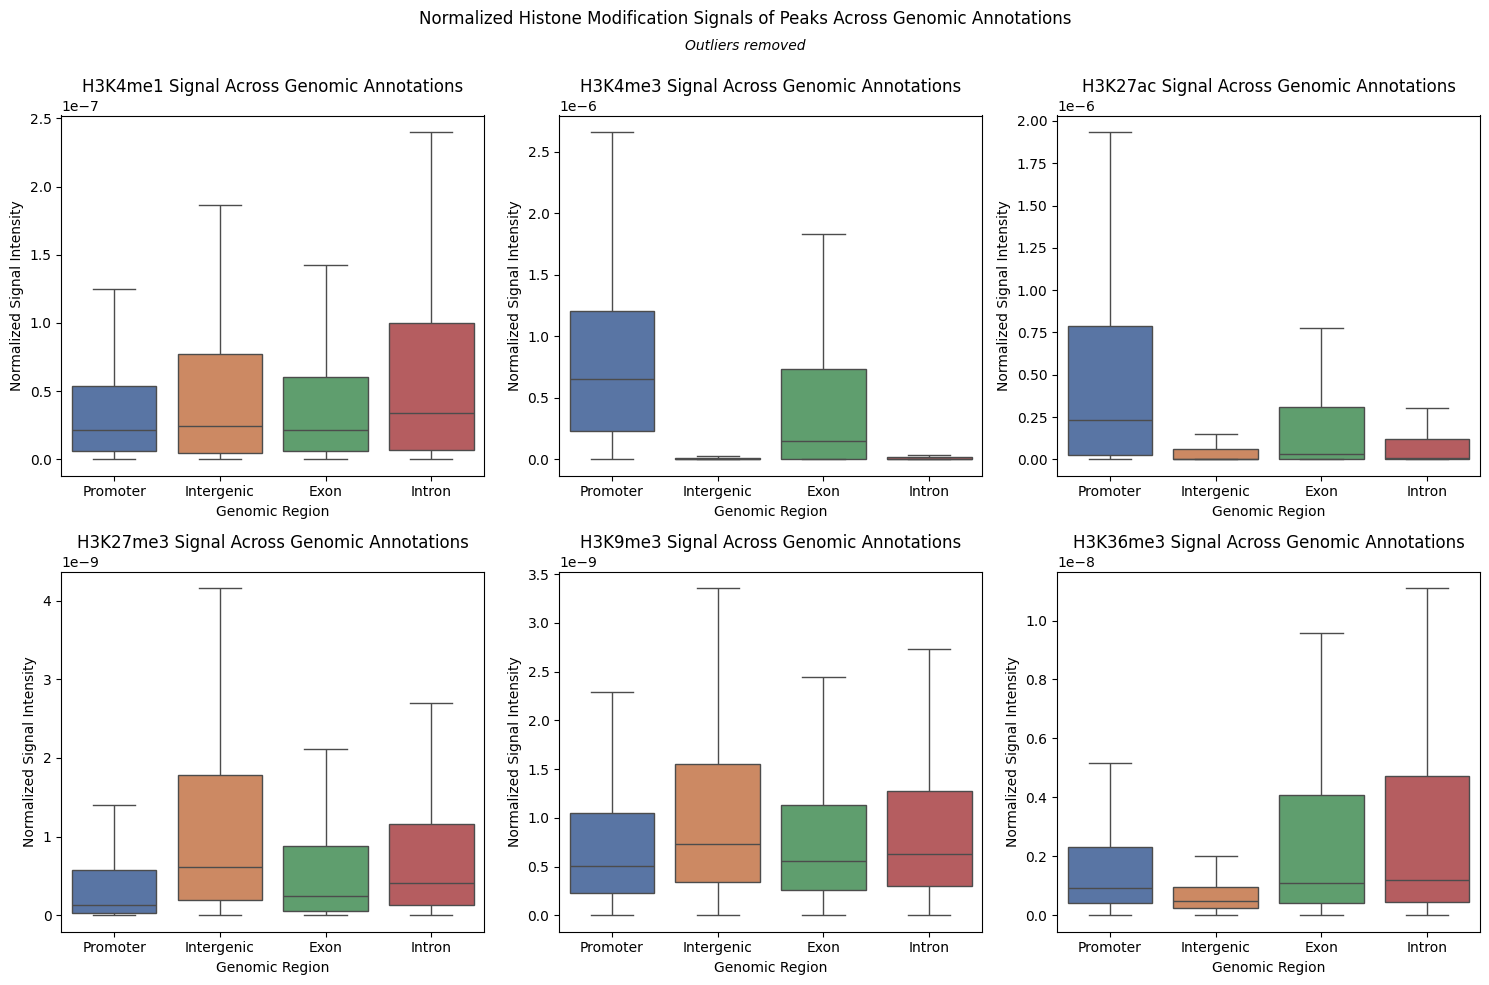

In [49]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load feature matrix with annotations
file_path = "/Users/faith/Desktop/BIO1018-Chromatin-Accessibility-ML/data/feature_matrix_with_annotations.csv"
df = pd.read_csv(file_path)

# Load chromosome lengths (GRCh38/hg38)
chromosome_lengths = {
    "chr1": 248956422, "chr2": 242193529, "chr3": 198295559, "chr4": 190214555,
    "chr5": 181538259, "chr6": 170805979, "chr7": 159345973, "chr8": 145138636,
    "chr9": 138394717, "chr10": 133797422, "chr11": 135086622, "chr12": 133275309,
    "chr13": 114364328, "chr14": 107043718, "chr15": 101991189, "chr16": 90338345,
    "chr17": 83257441, "chr18": 80373285, "chr19": 58617616, "chr20": 64444167,
    "chr21": 46709983, "chr22": 50818468, "chrX": 156040895
}

# Define histone marks and annotations
histone_marks = ["H3K4me1", "H3K4me3", "H3K27ac", "H3K27me3", "H3K9me3", "H3K36me3"]
annotations = ["Promoter", "Intergenic", "Exon", "Intron"]

# Normalize genomic positions by chromosome length
df["norm_position"] = df["Start"] / df["Chromosome"].map(chromosome_lengths)

# Normalize histone modification signals by chromosome length
for histone in histone_marks:
    df[histone] = df[histone] / df["Chromosome"].map(chromosome_lengths)

# Create subplots for histone mark distributions across genomic regions
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
fig.suptitle("Normalized Histone Modification Signals of Peaks Across Genomic Annotations")
plt.figtext(0.5, 0.94, "Outliers removed", ha="center", fontsize=10, style="italic")

for i, histone in enumerate(histone_marks):
    ax = axes[i // 3, i % 3]

    # Convert to long format for Seaborn plotting
    histone_subset = df.melt(id_vars=[histone], value_vars=annotations, 
                             var_name="Genomic Region", value_name="Presence")

    # Filter only rows where annotation is present (Presence == 1)
    histone_subset = histone_subset[histone_subset["Presence"] == 1]

    sns.boxplot(data=histone_subset, x="Genomic Region", y=histone, ax=ax, hue="Genomic Region", legend=False, palette="deep", showfliers=False)
    ax.set_title(f"{histone} Signal Across Genomic Annotations")
    ax.set_ylabel("Normalized Signal Intensity")
    ax.set_xlabel("Genomic Region")

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

### Adding Transcription Factors (TFs) Signal Intensities to the Final Feature Matrix

__ESR1__  
`wget https://www.encodeproject.org/files/ENCFF746RVZ/@@download/ENCFF746RVZ.bigWig`

__FOXA1__  
`wget https://www.encodeproject.org/files/ENCFF512UGW/@@download/ENCFF512UGW.bigWig`

__GATA3__  
`wget https://www.encodeproject.org/files/ENCFF951CUN/@@download/ENCFF951CUN.bigWig`

In [ ]:
# Convert H3K27ac bigWig to bedGraph
bigWigToBedGraph ESR1.bigWig ESR1.bedGraph

# Convert H3K4me1 bigWig to bedGraph
bigWigToBedGraph FOXA1.bigWig FOXA1.bedGraph

# Convert H3K27me3 bigWig to bedGraph
bigWigToBedGraph GATA3.bigWig GATA3.bedGraph

In [28]:
import pandas as pd

# File paths
full_matrix_file = "/Users/faith/Desktop/BIO1018-Chromatin-Accessibility-ML/data/genome_bins_histones_all_chrs_dedup.csv"
bed_file = "/Users/faith/Desktop/BIO1018-Chromatin-Accessibility-ML/data/genome_bins_simplified.bed"

# Define column names
columns = ["chromosome", "start", "end", "chromatin_state", "H3K4me1", "H3K4me3", "H3K27ac", "H3K27me3", "H3K9me3", "H3K36me3"]

# Load the CSV file (assuming comma-separated)
df = pd.read_csv(full_matrix_file, sep=",", header=0, dtype={"chromosome": str})

# Ensure columns exist
df = df[["chromosome", "start", "end"]]

# Force `start` and `end` to be integers
df["start"] = pd.to_numeric(df["start"], errors="coerce").fillna(0).astype(int)
df["end"] = pd.to_numeric(df["end"], errors="coerce").fillna(0).astype(int)

# Ensure no extra columns and use proper tab separation
df.to_csv(bed_file, sep="\t", header=False, index=False, quoting=None)

print(f"Successfully created BED file: {bed_file}")

Successfully created BED file: /Users/faith/Desktop/BIO1018-Chromatin-Accessibility-ML/data/genome_bins_simplified.bed


In [ ]:
bedtools map -a genome_bins_simplified.bed -b ESR1.bedGraph -c 4 -o mean > feature_matrix_ESR1.bed
bedtools map -a genome_bins_simplified.bed -b FOXA1.bedGraph -c 4 -o mean > feature_matrix_FOXA1.bed
bedtools map -a genome_bins_simplified.bed -b GATA3.bedGraph -c 4 -o mean > feature_matrix_GATA3.bed

In [ ]:
awk 'BEGIN {OFS="\t"} {if ($4 == ".") $4="0"; print}' feature_matrix_ESR1.bed > tmp && mv tmp feature_matrix_ESR1.bed
awk 'BEGIN {OFS="\t"} {if ($4 == ".") $4="0"; print}' feature_matrix_FOXA1.bed > tmp && mv tmp feature_matrix_FOXA1.bed
awk 'BEGIN {OFS="\t"} {if ($4 == ".") $4="0"; print}' feature_matrix_GATA3.bed > tmp && mv tmp feature_matrix_GATA3.bed

### View Each TF Matrix File

In [29]:
import pandas as pd

# Load the updated feature matrix
feature_matrix_file = "/Users/faith/Desktop/BIO1018-Chromatin-Accessibility-ML/data/feature_matrix_ESR1.bed"

# Define columns (assuming original columns + ESR1)
columns = ["chromosome", "start", "end", "ESR1_signal"]

# Read the CSV
feature_matrix = pd.read_csv(feature_matrix_file, sep="\t", names=columns)

# Generate descriptive statistics
esr1_stats = feature_matrix["ESR1_signal"].describe()

# Display results
print(esr1_stats)

# Check if ESR1 was added correctly
print(feature_matrix.head())

count    2.805747e+06
mean     1.474908e+00
std      5.757240e+01
min      0.000000e+00
25%      7.023200e-02
50%      1.666346e-01
75%      3.494827e-01
max      2.230684e+04
Name: ESR1_signal, dtype: float64
  chromosome  start    end  ESR1_signal
0       chr1      0   1000     0.000750
1       chr1   9000  10000     0.000750
2       chr1  10000  11000     0.000750
3       chr1  13000  14000     0.028817
4       chr1  16000  17000     0.002666


In [32]:
import pandas as pd

# Load the updated feature matrix
feature_matrix_file = "/Users/faith/Desktop/BIO1018-Chromatin-Accessibility-ML/data/feature_matrix_FOXA1.bed"

# Define columns (assuming original columns + ESR1)
columns = ["chromosome", "start", "end", "FOXA1_signal"]

# Read the CSV
feature_matrix = pd.read_csv(feature_matrix_file, sep="\t", names=columns)

# Generate descriptive statistics
foxa1_stats = feature_matrix["FOXA1_signal"].describe()

# Display results
print(foxa1_stats)

# Check if ESR1 was added correctly
print(feature_matrix.head())

count    2.805747e+06
mean     1.019349e+00
std      2.961572e+01
min      0.000000e+00
25%      9.806640e-02
50%      2.314697e-01
75%      4.479365e-01
max      3.770827e+04
Name: FOXA1_signal, dtype: float64
  chromosome  start    end  FOXA1_signal
0       chr1      0   1000      0.001640
1       chr1   9000  10000      0.019745
2       chr1  10000  11000      0.042568
3       chr1  13000  14000      0.001640
4       chr1  16000  17000      0.034382


In [36]:
import pandas as pd

# Load the updated feature matrix
feature_matrix_file = "/Users/faith/Desktop/BIO1018-Chromatin-Accessibility-ML/data/feature_matrix_GATA3.bed"

# Define columns (assuming original columns + ESR1)
columns = ["chromosome", "start", "end", "GATA3_signal"]

# Read the CSV
feature_matrix = pd.read_csv(feature_matrix_file, sep="\t", names=columns)

# Generate descriptive statistics
gata3_stats = feature_matrix["GATA3_signal"].describe()

# Display results
print(gata3_stats)

# Check if ESR1 was added correctly
print(feature_matrix.head())

count    2.805747e+06
mean     3.090687e-01
std      1.654903e+00
min      0.000000e+00
25%      7.474053e-02
50%      1.574655e-01
75%      3.027141e-01
max      3.097888e+02
Name: GATA3_signal, dtype: float64
  chromosome  start    end  GATA3_signal
0       chr1      0   1000      0.014090
1       chr1   9000  10000      0.014090
2       chr1  10000  11000      0.014090
3       chr1  13000  14000      0.014090
4       chr1  16000  17000      0.057915


In [37]:
import pandas as pd

# File paths
histones_file = "/Users/faith/Desktop/BIO1018-Chromatin-Accessibility-ML/data/genome_bins_histones_all_chrs_dedup.csv"
esr1_file = "/Users/faith/Desktop/BIO1018-Chromatin-Accessibility-ML/data/feature_matrix_ESR1.bed"
foxa1_file = "/Users/faith/Desktop/BIO1018-Chromatin-Accessibility-ML/data/feature_matrix_FOXA1.bed"
gata3_file = "/Users/faith/Desktop/BIO1018-Chromatin-Accessibility-ML/data/feature_matrix_GATA3.bed"
output_file = "/Users/faith/Desktop/BIO1018-Chromatin-Accessibility-ML/data/final_feature_matrix.csv"

# Load histones dataset (assuming it has a header)
df_histones = pd.read_csv(histones_file, sep=",", header=0, dtype={"chromosome": str})

def add_tf_signal(df, tf_file, tf_name):
    """Load a BED file and append its fourth column as a new feature."""
    df_tf = pd.read_csv(tf_file, sep="\t", header=None)

    # Ensure the TF file has at least 4 columns
    if df_tf.shape[1] < 4:
        raise ValueError(f"{tf_name} BED file has less than 4 columns.")

    # Extract the fourth column (index 3)
    tf_signal = df_tf.iloc[:, 3]  # Index 3 = fourth column

    # Ensure signal length matches the histones file
    if len(tf_signal) < len(df):
        raise ValueError(f"{tf_name} file has fewer rows than the histones file. Ensure correct alignment.")

    # Append TF signal as a new column
    df[tf_name + "_signal"] = tf_signal.values[:len(df)]
    return df

# Add transcription factor signals
df_histones = add_tf_signal(df_histones, esr1_file, "ESR1")
df_histones = add_tf_signal(df_histones, foxa1_file, "FOXA1")
df_histones = add_tf_signal(df_histones, gata3_file, "GATA3")

# Save the updated dataframe
df_histones.to_csv(output_file, sep=",", index=False)

print(f"Successfully added ESR1, FOXA1, and GATA3 signal columns and saved to: {output_file}")

Successfully added ESR1, FOXA1, and GATA3 signal columns and saved to: /Users/faith/Desktop/BIO1018-Chromatin-Accessibility-ML/data/final_feature_matrix.csv


In [52]:
dataframe = pd.read_csv("/Users/faith/Desktop/BIO1018-Chromatin-Accessibility-ML/data/final_feature_matrix.csv")

print(dataframe)

        chromosome     start       end  chromatin_state   H3K4me1   H3K4me3  \
0             chr1         0      1000                0  0.000210  0.011010   
1             chr1      9000     10000                0  0.000210  0.011010   
2             chr1     10000     11000                0  0.000210  0.011010   
3             chr1     13000     14000                0  0.000210  0.011010   
4             chr1     16000     17000                0  0.000210  0.122936   
...            ...       ...       ...              ...       ...       ...   
2805742       chrY  56883000  56884000                0  0.021800  0.167282   
2805743       chrY  56884000  56885000                0  0.014736  0.011010   
2805744       chrY  56885000  56886000                0  0.000000  0.070979   
2805745       chrY  56886000  56887000                0  0.000000  0.000000   
2805746       chrY  56887000  56888000                0  0.000000  0.000000   

          H3K27ac  H3K27me3   H3K9me3  H3K36me3  ES

In [38]:
import pandas as pd

# Load the dataset
file_path = "/Users/faith/Desktop/BIO1018-Chromatin-Accessibility-ML/data/final_feature_matrix.csv"
df = pd.read_csv(file_path)

# Extract histone marks columns (assuming the column names are known)
TF_signals = ["ESR1_signal", "FOXA1_signal", "GATA3_signal"]

# Describe the histone marks to check their distribution
TF_signals_stats = df[TF_signals].describe()

TF_signals_stats

,ESR1_signal,FOXA1_signal,GATA3_signal
count,2.805747e+06,2.805747e+06,2.805747e+06
mean,1.474908e+00,1.019349e+00,3.090687e-01
std,5.757240e+01,2.961572e+01,1.654903e+00
min,0.000000e+00,0.000000e+00,0.000000e+00
25%,7.023200e-02,9.806640e-02,7.474053e-02
50%,1.666346e-01,2.314697e-01,1.574655e-01
75%,3.494827e-01,4.479365e-01,3.027141e-01
max,2.230684e+04,3.770827e+04,3.097888e+02


### Distribution Plots for Peak Lengths & Transcription Factor Signals

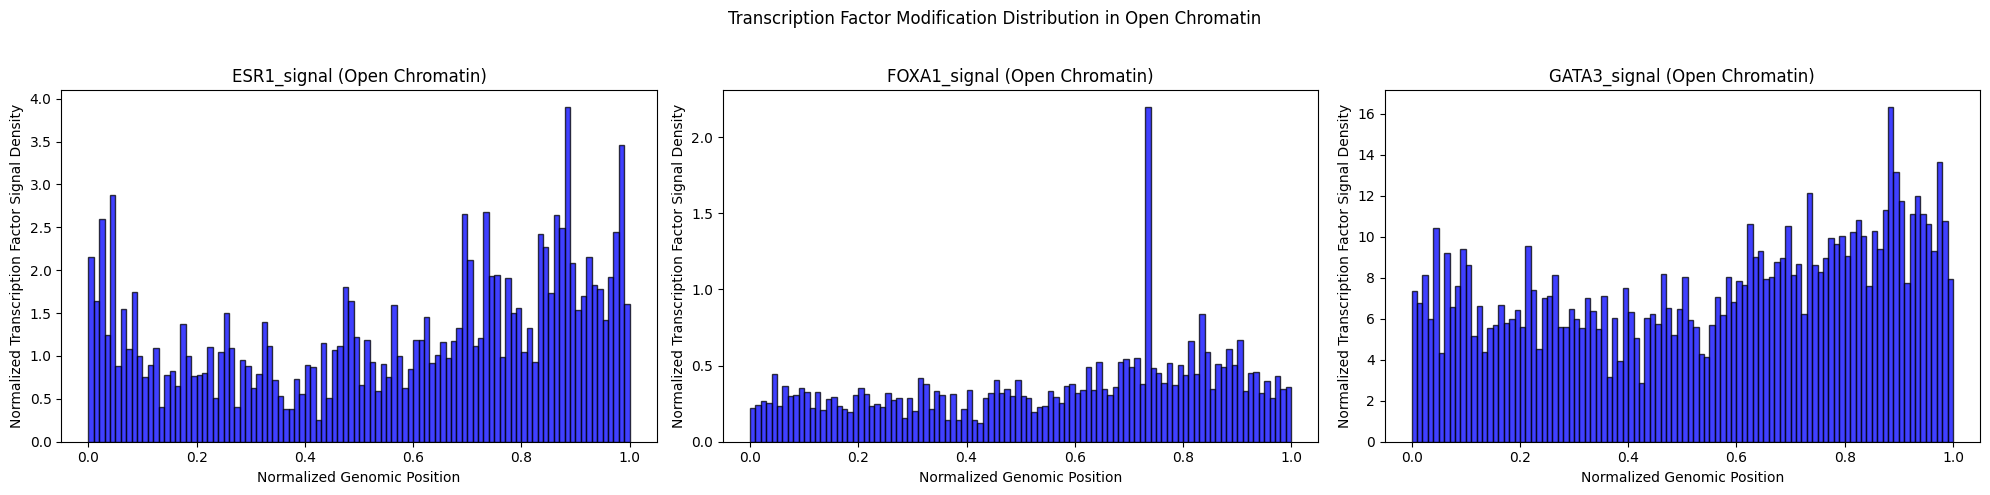

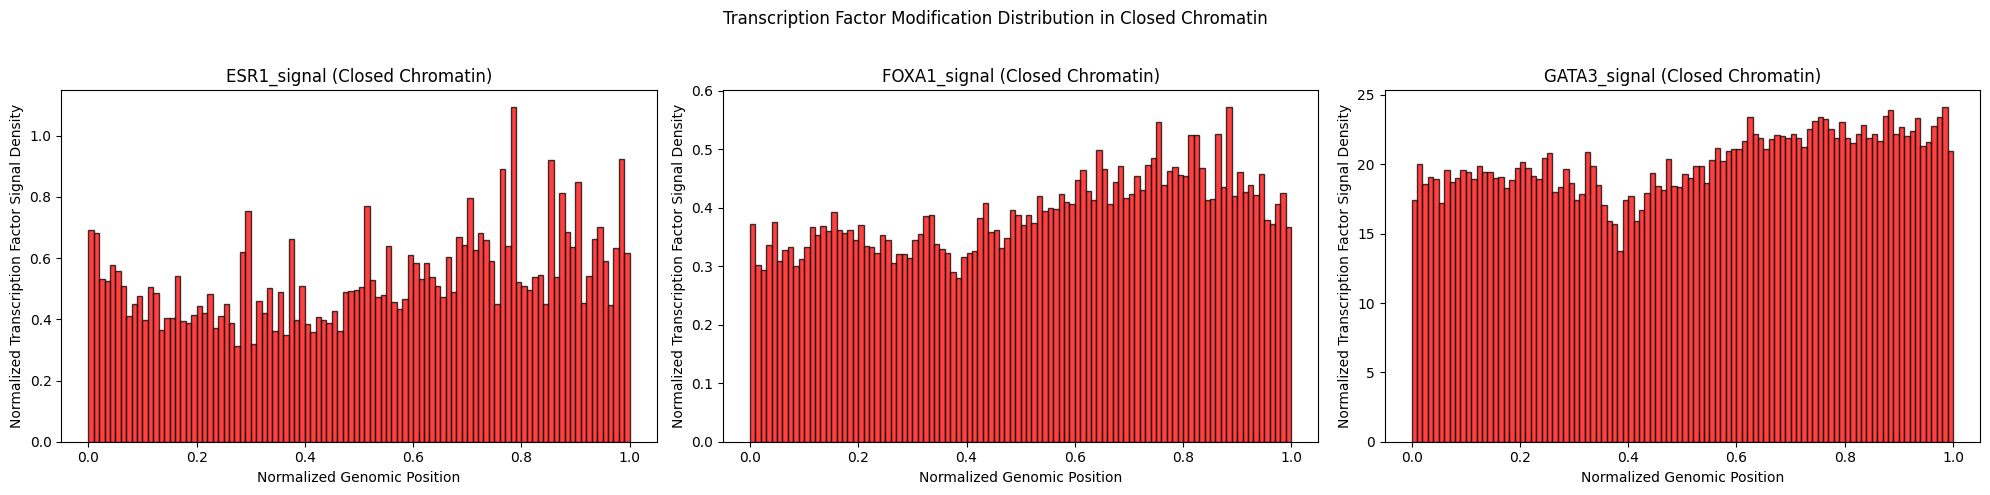

In [8]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Load chromosome lengths (GRCh38/hg38)
chromosome_lengths = {
    "chr1": 248956422, "chr2": 242193529, "chr3": 198295559, "chr4": 190214555,
    "chr5": 181538259, "chr6": 170805979, "chr7": 159345973, "chr8": 145138636,
    "chr9": 138394717, "chr10": 133797422, "chr11": 135086622, "chr12": 133275309,
    "chr13": 114364328, "chr14": 107043718, "chr15": 101991189, "chr16": 90338345,
    "chr17": 83257441, "chr18": 80373285, "chr19": 58617616, "chr20": 64444167,
    "chr21": 46709983, "chr22": 50818468, "chrX": 156040895
}

# Load histone signal data
histone_signals_file = "/Users/faith/Desktop/BIO1018-Chromatin-Accessibility-ML/data/final_feature_matrix.csv"
# Using a previously generated file, that was created retrospecitvely.
# The above code and output file will yield the same result, simply change columns names from histone_columns.

histone_columns = ["chromosome", "start", "end", "chromatin_state", 
                   "H3K4me1", "H3K4me3", "H3K27ac", "H3K27me3", "H3K9me3", "H3K36me3",
                   "ESR1_signal", "FOXA1_signal", "GATA3_signal"]

histone_signals = pd.read_csv(histone_signals_file, sep=",", header=0, names=histone_columns)

# Ensure chromosome names are strings
histone_signals["chromosome"] = histone_signals["chromosome"].astype(str)

# Normalize genomic positions by chromosome length
histone_signals["norm_position"] = histone_signals["start"] / histone_signals["chromosome"].map(chromosome_lengths)

# Normalize histone signals (Min-Max Scaling per mark)
TF_marks = ["ESR1_signal","FOXA1_signal","GATA3_signal"]
for TF in TF_marks:
    histone_signals[TF] = (histone_signals[TF] - histone_signals[TF].min()) / (histone_signals[TF].max() - histone_signals[TF].min())

# Separate open and closed chromatin regions
open_chromatin = histone_signals[histone_signals["chromatin_state"] == 1]
closed_chromatin = histone_signals[histone_signals["chromatin_state"] == 0]

# Create 2x3 subplots for open chromatin
fig, axes = plt.subplots(1, 3, figsize=(20, 5))
fig.suptitle("Transcription Factor Modification Distribution in Open Chromatin")

axes = axes.flatten()
for i, TF in enumerate(TF_marks):
    ax = axes[i]
    ax.hist(open_chromatin["norm_position"], bins=100, weights=open_chromatin[TF], alpha=0.75, color="blue", edgecolor="black")
    ax.set_xlabel("Normalized Genomic Position")
    ax.set_ylabel("Normalized Transcription Factor Signal Density")
    ax.set_title(f"{TF} (Open Chromatin)")

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

# Create 2x3 subplots for closed chromatin
fig, axes = plt.subplots(1, 3, figsize=(20, 5))
fig.suptitle("Transcription Factor Modification Distribution in Closed Chromatin")

axes = axes.flatten()
for i, TF in enumerate(TF_marks):
    ax = axes[i]
    ax.hist(closed_chromatin["norm_position"], bins=100, weights=closed_chromatin[TF], alpha=0.75, color="red", edgecolor="black")
    ax.set_xlabel("Normalized Genomic Position")
    ax.set_ylabel("Normalized Transcription Factor Signal Density")
    ax.set_title(f"{TF} (Closed Chromatin)")

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

### Boxplot for Each Transcription Factor Signal

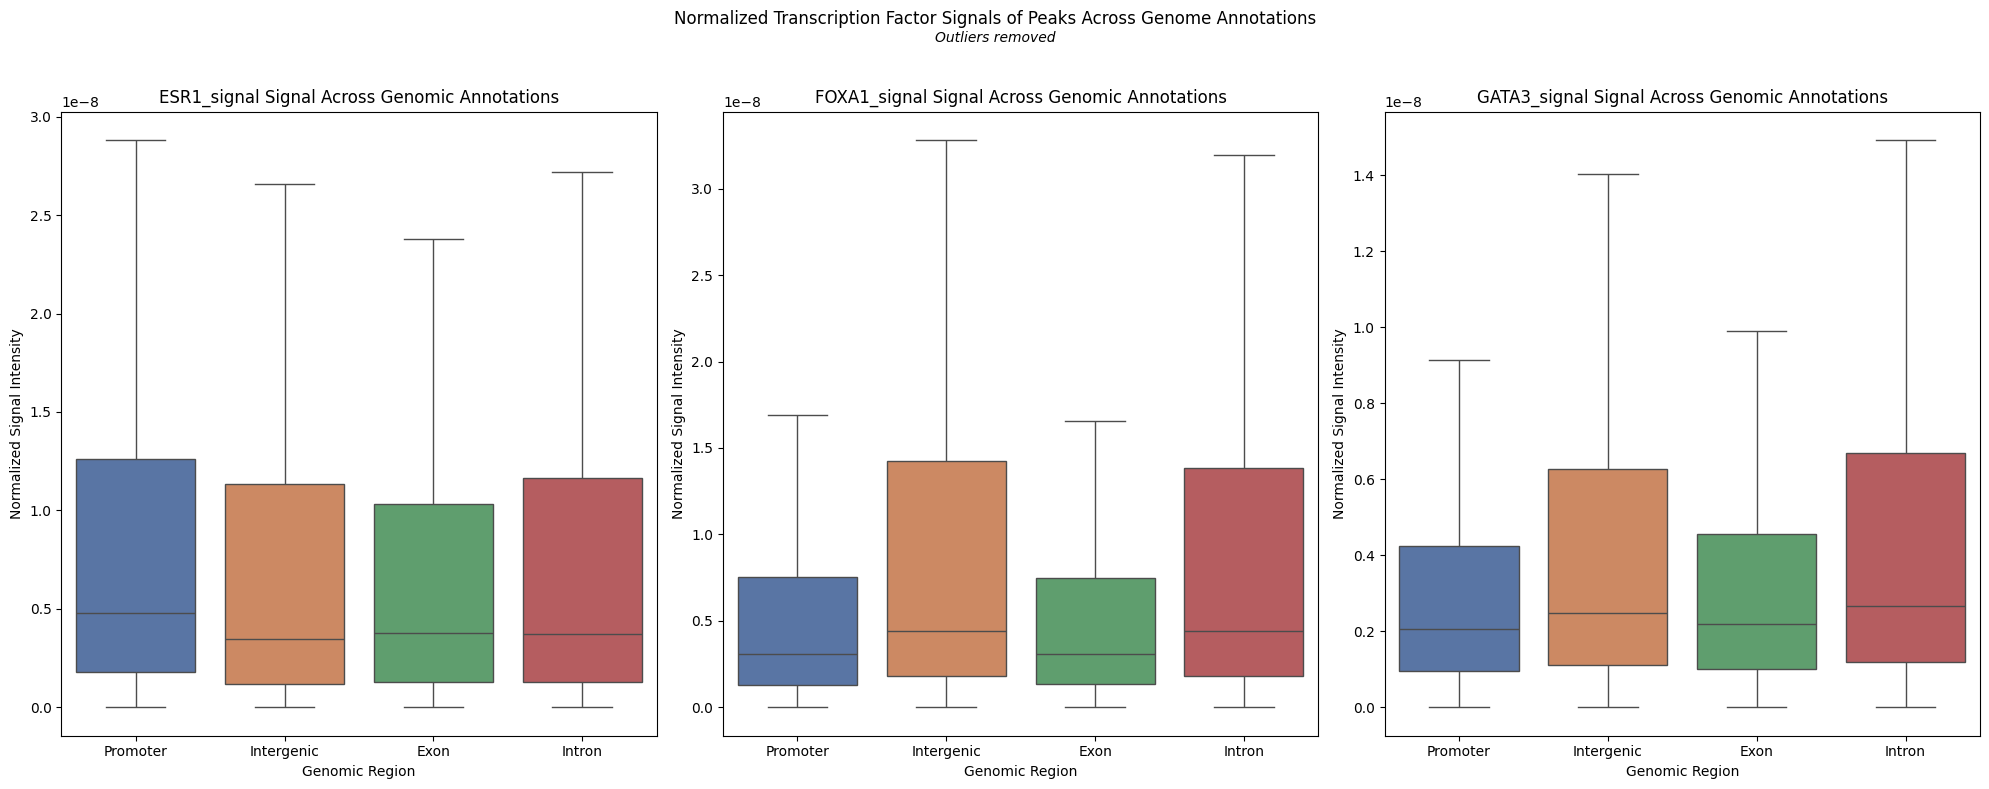

In [12]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load feature matrix with annotations
file_path = "/Users/faith/Desktop/BIO1018-Chromatin-Accessibility-ML/data/feature_matrix_with_annotations.csv"
df = pd.read_csv(file_path)

# Load chromosome lengths (GRCh38/hg38)
chromosome_lengths = {
    "chr1": 248956422, "chr2": 242193529, "chr3": 198295559, "chr4": 190214555,
    "chr5": 181538259, "chr6": 170805979, "chr7": 159345973, "chr8": 145138636,
    "chr9": 138394717, "chr10": 133797422, "chr11": 135086622, "chr12": 133275309,
    "chr13": 114364328, "chr14": 107043718, "chr15": 101991189, "chr16": 90338345,
    "chr17": 83257441, "chr18": 80373285, "chr19": 58617616, "chr20": 64444167,
    "chr21": 46709983, "chr22": 50818468, "chrX": 156040895
}

# Define histone marks and annotations
TF_marks = ["ESR1_signal","FOXA1_signal","GATA3_signal"]
annotations = ["Promoter", "Intergenic", "Exon", "Intron"]

# Normalize genomic positions by chromosome length
df["norm_position"] = df["Start"] / df["Chromosome"].map(chromosome_lengths)

# Normalize histone modification signals by chromosome length
for TF in TF_marks:
    df[TF] = df[TF] / df["Chromosome"].map(chromosome_lengths)

# Create subplots for histone mark distributions across genomic regions
fig, axes = plt.subplots(1, 3, figsize=(20, 8))
fig.suptitle("Normalized Transcription Factor Signals of Peaks Across Genome Annotations")
plt.figtext(0.5, 0.94, "Outliers removed", ha="center", fontsize=10, style="italic")

for i, TF in enumerate(TF_marks):
    ax = axes[i]

    # Convert to long format for Seaborn plotting
    TF_subset = df.melt(id_vars=[TF], value_vars=annotations, 
                             var_name="Genomic Region", value_name="Presence")

    # Filter only rows where annotation is present (Presence == 1)
    TF_subset = TF_subset[TF_subset["Presence"] == 1]

    sns.boxplot(data=TF_subset, x="Genomic Region", y=TF, ax=ax, hue="Genomic Region", legend=False, palette="deep", showfliers=False)
    ax.set_title(f"{TF} Signal Across Genomic Annotations")
    ax.set_ylabel("Normalized Signal Intensity")
    ax.set_xlabel("Genomic Region")

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

### Mann-Whitney U Test (Statistical Significance)
To test if histone modfifcations and transcription factor signal values differ significantly between open (1) and closed (0) chromatin, we can use the Mann-Whitney U test.

In [1]:
import pandas as pd
from scipy.stats import mannwhitneyu

# Load chromosome lengths (GRCh38/hg38)
chromosome_lengths = {
    "chr1": 248956422, "chr2": 242193529, "chr3": 198295559, "chr4": 190214555,
    "chr5": 181538259, "chr6": 170805979, "chr7": 159345973, "chr8": 145138636,
    "chr9": 138394717, "chr10": 133797422, "chr11": 135086622, "chr12": 133275309,
    "chr13": 114364328, "chr14": 107043718, "chr15": 101991189, "chr16": 90338345,
    "chr17": 83257441, "chr18": 80373285, "chr19": 58617616, "chr20": 64444167,
    "chr21": 46709983, "chr22": 50818468, "chrX": 156040895
}

# Load feature matrix
feature_matrix_file = "/Users/faith/Desktop/BIO1018-Chromatin-Accessibility-ML/data/final_feature_matrix.csv"
df = pd.read_csv(feature_matrix_file, sep=",", header=0)

# Exclude chromosome 1 from analysis
df = df[df["chromosome"] != "chr1"]

# Define histone marks and transcription factors
histone_marks = ["H3K4me1", "H3K4me3", "H3K27ac", "H3K27me3", "H3K9me3", "H3K36me3"]
TF_marks = ["ESR1_signal", "FOXA1_signal", "GATA3_signal"]

# Map chromosome lengths and normalize signals
df["chromosome_length"] = df["chromosome"].map(chromosome_lengths)

for feature in histone_marks + TF_marks:
    df[feature] = df[feature] / df["chromosome_length"]

# Perform Mann-Whitney U test for both histone marks and TF signals
print("Mann-Whitney U Test Results (Normalized by Chromosome Length, Chromosome 1 Excluded):\n")

results = []
for feature in histone_marks + TF_marks:
    open_state = df[df["chromatin_state"] == 1][feature]
    closed_state = df[df["chromatin_state"] == 0][feature]
    
    stat, p = mannwhitneyu(open_state, closed_state, alternative='two-sided')
    results.append({"Feature": feature, "U-Statistic": stat, "p-value": p})

# Convert results to DataFrame and display
results_df = pd.DataFrame(results)
print(results_df)

Mann-Whitney U Test Results (Normalized by Chromosome Length, Chromosome 1 Excluded):

        Feature   U-Statistic       p-value
0       H3K4me1  2.888296e+11  0.000000e+00
1       H3K4me3  2.685570e+11  0.000000e+00
2       H3K27ac  2.743614e+11  0.000000e+00
3      H3K27me3  1.066594e+11  0.000000e+00
4       H3K9me3  1.217428e+11  0.000000e+00
5      H3K36me3  1.652805e+11  2.747055e-90
6   ESR1_signal  2.395015e+11  0.000000e+00
7  FOXA1_signal  2.345255e+11  0.000000e+00
8  GATA3_signal  2.311937e+11  0.000000e+00


### Mann-Whitney U Test Results Interpretation  

The **Mann-Whitney U test** compares the distribution of histone modification and transcription factor (TF) signals between **open (1) and closed (0) chromatin states**. Since chromatin state is **binary**, this **non-parametric test** assesses whether signal intensity distributions significantly differ between these two groups.  

The **Mann-Whitney U statistic** is calculated as:  

$$
U = n_1 n_2 + \frac{n_1 (n_1 + 1)}{2} - R_1
$$  

where:  
- $n_1$ and $n_2$ are the sample sizes of the two groups,  
- $R_1$ is the sum of ranks for the first group.  

A **smaller $U$ value** suggests that the **first group (open chromatin)** has lower values than the second (closed chromatin), while a **larger $U$** indicates enrichment in open chromatin.  

### **Results (Chromosome 1 Excluded, Normalized by Chromosome Length)**  

| Feature        | U-Statistic         | p-value  | Interpretation |
|--------------|------------------|---------|----------------|
| **H3K4me1**  | $2.89 \times 10^{11}$ | $< 0.00001$ | Strongest association with open chromatin. Enriched in open chromatin (enhancer-associated). |
| **H3K4me3**  | $2.69 \times 10^{11}$ | $< 0.00001$ | Enrichment in open chromatin confirms its role as a promoter mark. |
| **H3K27ac**  | $2.74 \times 10^{11}$ | $< 0.00001$ | Enriched in open chromatin, marking active enhancers and promoters. |
| **H3K27me3** | $1.07 \times 10^{11}$ | $< 0.00001$ | Strongly enriched in closed chromatin, confirming its role as a repressive histone mark. |
| **H3K9me3**  | $1.22 \times 10^{11}$ | $< 0.00001$ | Consistently enriched in heterochromatin and repressed genomic regions. |
| **H3K36me3** | $1.65 \times 10^{11}$ | $2.75 \times 10^{-90}$ | Associated with transcribed regions, showing mixed enrichment based on chromatin context. |
| **ESR1_signal**  | $2.40 \times 10^{11}$ | $< 0.00001$ | Enriched in open chromatin, indicating active regulatory roles. |
| **FOXA1_signal** | $2.35 \times 10^{11}$ | $< 0.00001$ | Enriched in open chromatin, supporting its function in enhancer accessibility. |
| **GATA3_signal** | $2.31 \times 10^{11}$ | $< 0.00001$ | Enriched in open chromatin, associated with transcriptional regulation. |

---

### **Key Observations:**  
- **H3K4me1** has the highest U-statistic among histone marks, reinforcing its role as a **enhancer-associated mark in open chromatin**.  
- **H3K27me3** has the lowest U-statistic, confirming its **repressive function in closed chromatin**.  
- **H3K4me3** and **H3K27ac** behave as expected, **linking enhancers and promoters to open chromatin**.  
- **H3K9me3** shows strong enrichment in **heterochromatin**, consistent with its role in **transcriptional repression**.  
- **H3K36me3** is associated with **actively transcribed genes**, which explains its **mixed enrichment pattern**.  
- **ESR1, FOXA1, and GATA3 signals** are all significantly enriched in **open chromatin**, highlighting their roles as key **regulatory transcription factors**.  

These findings confirm expected **epigenetic and transcription factor binding relationships** and support the use of these features as **predictive variables for chromatin accessibility** in a machine learning model.